In [3]:
import io
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [3]:
embeding_layers = layers.Embedding(1000,5)

In [4]:
result = embeding_layers(tf.constant([1,2,3]))

In [6]:
print(result.numpy())
print(result.numpy().shape)

[[-1.0865532e-02  4.3392051e-02 -2.2063447e-02  4.7772143e-02
  -8.9240447e-03]
 [ 1.6354024e-05  2.4882030e-02 -3.9707996e-02 -1.0419190e-02
   4.3445554e-02]
 [-4.5119204e-02  3.0629523e-03  3.2486048e-02 -3.9406706e-02
   2.8281379e-02]]
(3, 5)


In [7]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k',
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    with_info=True, as_supervised=True)

encoder = info.features['text'].encoder
print(encoder.subwords[:20])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/incomplete.B8I82K_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/incomplete.B8I82K_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/incomplete.B8I82K_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.
['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_']


Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5497 - loss: 0.6848 - val_accuracy: 0.7050 - val_loss: 0.6156
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7194 - loss: 0.5604 - val_accuracy: 0.7700 - val_loss: 0.5069
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7999 - loss: 0.4385 - val_accuracy: 0.8650 - val_loss: 0.3713
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8333 - loss: 0.3804 - val_accuracy: 0.8150 - val_loss: 0.3915
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8515 - loss: 0.3462 - val_accuracy: 0.8300 - val_loss: 0.4035
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8699 - loss: 0.3173 - val_accuracy: 0.8350 - val_loss: 0.4133
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8825 - loss: 0.2926 - val_accuracy: 0.8800 - val_loss: 0.3073
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8886 - loss: 0.2772 

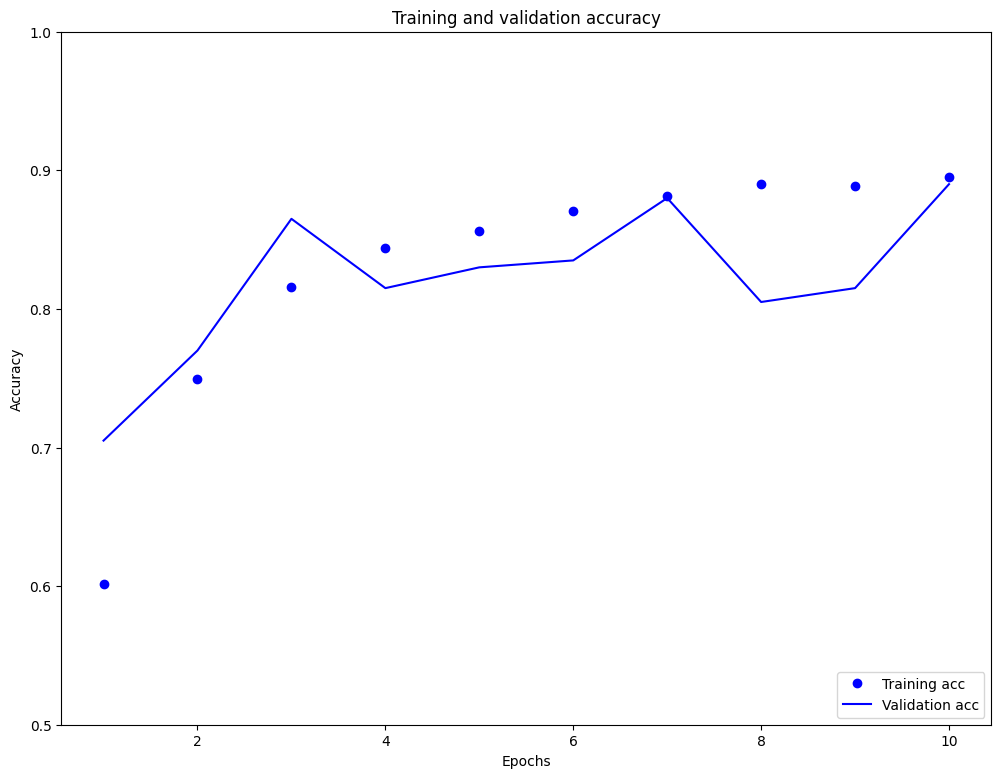

In [9]:
padded_shapes = ([None],())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes)

embedding_dim = 16
model = keras.Sequential([
    layers.Embedding(encoder.vocab_size, embedding_dim),
    layers.GlobalAveragePooling1D(),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    epochs=10,
    validation_data=test_batches, validation_steps=20)

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.5661 - loss: 0.6809 - val_accuracy: 0.7150 - val_loss: 0.6013
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7282 - loss: 0.5525 - val_accuracy: 0.7300 - val_loss: 0.4783
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8062 - loss: 0.4389 - val_accuracy: 0.8250 - val_loss: 0.4398
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8390 - loss: 0.3741 - val_accuracy: 0.8100 - val_loss: 0.4011
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8598 - loss: 0.3342 - val_accuracy: 0.8400 - val_loss: 0.3385
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8729 - loss: 0.3096 - val_accuracy: 0.8200 - val_loss: 0.4134
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8826 - loss: 0.2880 - val_accuracy: 0.8700 - val_loss: 0.3514
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8820 - loss: 0

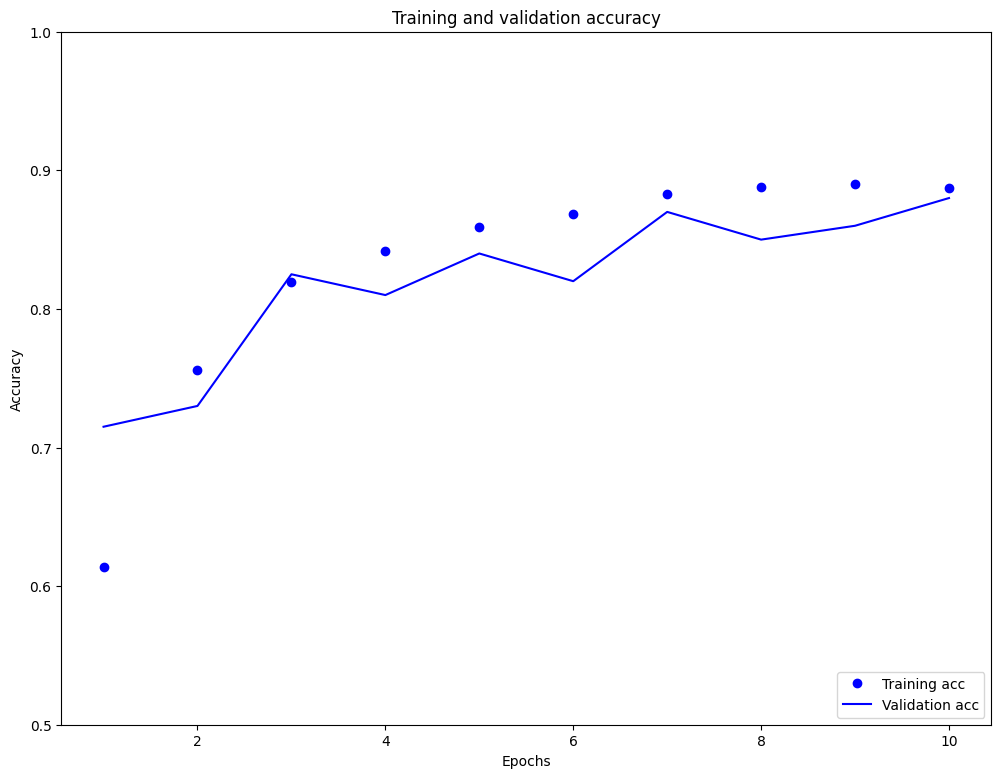

0

In [5]:
def get_batch_data():
  (train_data, test_data), info = tfds.load(
      'imdb_reviews/subwords8k',
      split = (tfds.Split.TRAIN, tfds.Split.TEST),
      with_info=True, as_supervised=True)

  encoder = info.features['text'].encoder

  padded_shapes = ([None],())
  train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes)
  test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes)

  return train_batches, test_batches, encoder


def get_model(embedding_dim, encoder):

  model = keras.Sequential([
      layers.Embedding(encoder.vocab_size, embedding_dim),
      layers.GlobalAveragePooling1D(),
      layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model


def plot_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(1, len(acc) + 1)

  plt.figure(figsize=(12,9))
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc='lower right')
  plt.ylim((0.5,1))
  plt.show()

  return 0

def retrieve_embedings(model, encoder):

  out_vectors = io.open('vectors.tsv', 'w', encoding='utf-8')
  out_meta = io.open('meta.tsv', 'w', encoding='utf-8')
  weights = model.layers[0].get_weights()[0]

  for num, word in enumerate(encoder.subwords):
    vec = weights[num+1]
    out_vectors.write('\t'.join([str(x) for x in vec]) + "\n")
    out_meta.write(word + "\n")

  out_vectors.close()
  out_meta.close()

  return 0



train_batches, test_batches, encoder = get_batch_data()
model = get_model(16, encoder)
history = model.fit(
    train_batches,
    epochs=10,
    validation_data=test_batches,
    validation_steps=20)

plot_history(history)
retrieve_embedings(model, encoder)

In [6]:
retrieve_embedings(model, encoder)

0